In [4]:
!pip install control -U
!pip install sympy -U

In [5]:
import matplotlib.pyplot as plt
import control as ctrl

In [6]:
# Numeric values of partial derivatives of theta and I_dot calculated in system_derivation.ipynb
A = 209.109726489593
B = -16.0791589363018
C = 662.228074503118
D = 0
E = -15040.865825401
F = 6.83675719336409
s = ctrl.TransferFunction.s

Gx = (C * F) / ((s ** 3) - s ** 2 * (B + E) - s * (A - B * E) + A * E)
Gx

TransferFunction(array([4527.49255201]), array([ 1.00000000e+00,  1.50569450e+04,  2.41635362e+05, -3.14519134e+06]))

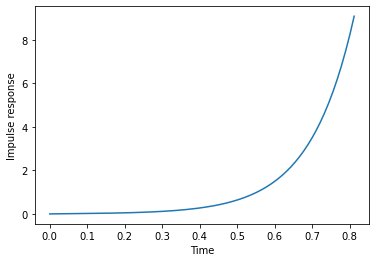

In [7]:
# Impulse response of uncontrolled system
t_imp, x_imp = ctrl.impulse_response(Gx)

# Plot the impulse response
plt.plot(t_imp, x_imp)
plt.xlabel('Time')
plt.ylabel('Impulse response')
plt.show()

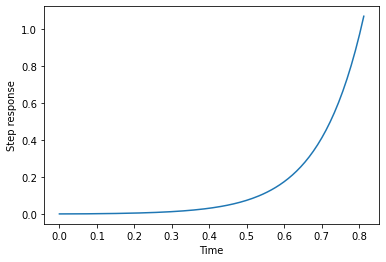

In [8]:
# Step response of uncontrolled system
t_step, x_step = ctrl.step_response(Gx)

# Plot the step response
plt.plot(t_step, x_step)
plt.xlabel('Time')
plt.ylabel('Step response')
plt.show()

In [9]:
Km = 1
Tm = 0.03
# Transfer function for the sensor measuring the position of the ball, acts as a 30ms delay back to the PID controller
Gs = (Km) / (Tm*s + 1)

# Connect system transfer function and the sensor in series
G = ctrl.series(Gx, Gs)

In [10]:
Kp = 980
Ki = 0
Kd = 50
Gc = Kp + Ki/s + Kd*s

# Add the controller feedback loop, Gload is the whole system
Gload = ctrl.feedback(G, Gc)
Gload

TransferFunction(array([4527.49255201]), array([3.00000000e-02, 4.52708350e+02, 2.23060059e+04, 3.73654250e+05,
       1.29175136e+06]))

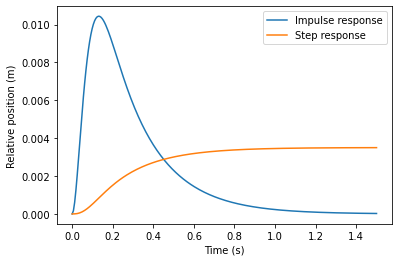

In [13]:
# Impulse response
t_imp, x_imp = ctrl.impulse_response(Gload)
# Step response
t_step, x_step = ctrl.step_response(Gload)

plt.plot(t_imp, x_imp, label='Impulse response')
plt.plot(t_step, x_step, label='Step response')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Relative position (m)')
plt.show()

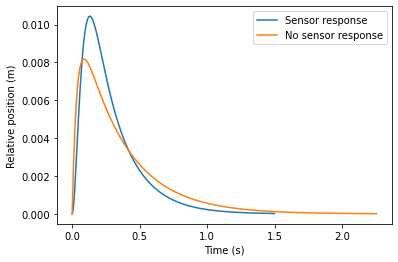

In [12]:
# Compare the system's output with and without the sensor in place to analyze the effect
G_nosensor = ctrl.feedback(Gx, Gc)

# Impulse response without sensor
t_imp_ns, x_imp_ns = ctrl.impulse_response(G_nosensor)
# Impulse response with sensor
t_imp_s, x_imp_s = ctrl.impulse_response(Gload)

plt.plot(t_imp_s, x_imp_s, label='Sensor response') # Blue
plt.plot(t_imp_ns, x_imp_ns, label='No sensor response') # Orange
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Relative position (m)')
plt.show()